<a href="https://colab.research.google.com/github/canerborekci/CarPrediction/blob/main/car_prediction_commentsiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import neighbors
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [137]:
uploaded = files.upload()        
df=pd.read_csv(io.BytesIO(uploaded['turkey_car_market.csv']))

Saving turkey_car_market.csv to turkey_car_market.csv


In [138]:
df.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [139]:
#Veri tipleri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9044 entries, 0 to 9043
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   İlan Tarihi     9044 non-null   object 
 1   Marka           9044 non-null   object 
 2   Arac Tip Grubu  9044 non-null   object 
 3   Arac Tip        9044 non-null   object 
 4   Model Yıl       9044 non-null   float64
 5   Yakıt Turu      9044 non-null   object 
 6   Vites           9044 non-null   object 
 7   CCM             9044 non-null   object 
 8   Beygir Gucu     9044 non-null   object 
 9   Renk            9044 non-null   object 
 10  Kasa Tipi       9044 non-null   object 
 11  Kimden          9044 non-null   object 
 12  Durum           9044 non-null   object 
 13  Km              9044 non-null   int64  
 14  Fiyat           9044 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


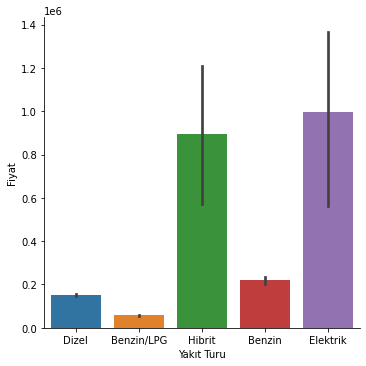

In [151]:
sns.catplot(x="Yakıt Turu", y="Fiyat", kind="bar", data=df);

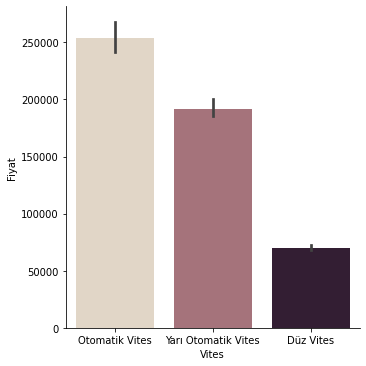

In [26]:
sns.catplot(x="Vites", y="Fiyat", kind="bar", data=df, palette="ch:.25");

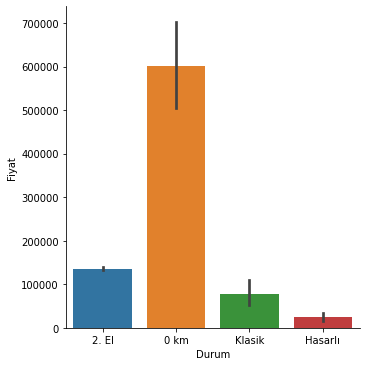

In [ ]:
sns.catplot(x="Durum", y="Fiyat", kind="bar", data=df);


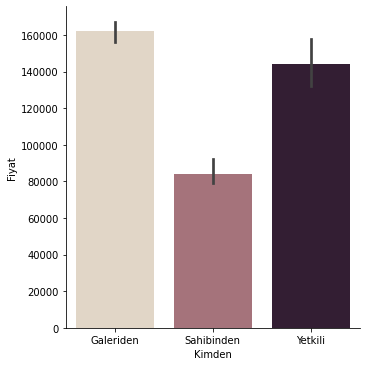

In [ ]:
sns.catplot(x="Kimden", y="Fiyat", kind="bar", data=df, palette="ch:.25");

In [27]:
print(len(df['Marka'].unique()))               
markalar=df['Marka'].unique()
print(markalar)

36
['Jaguar' 'Acura' 'Jeep' 'Hyundai' 'Alfa Romeo' 'Audi' 'Mercedes'
 'Volkswagen' 'Land Rover' 'BMW' 'Dacia' 'Renault' 'Peugeot' 'Chevrolet'
 'Chery' 'Citroen' 'Chrysler' 'Fiat' 'Ford' 'Honda' 'Geely' 'Infiniti'
 'Isuzu' 'Kia' 'Lada' 'Maserati' 'Mazda' 'Mini' 'Mitsubishi' 'Nissan'
 'Opel' 'Porsche' 'Rover' 'Seat' 'Skoda' 'Tofaş']


In [28]:
print(len(df['Arac Tip'].unique()))
car_type=df['Arac Tip'].unique()
print(car_type)

1759
['2.0 D Prestige Plus' '-' '2.2' ... 'SLX ie' 'SL' 'L']


In [ ]:
len(df[df['Arac Tip']=='-'])  

55

In [ ]:
print(len(df['Yakıt Turu'].unique()))
yakıt_type=df['Yakıt Turu'].unique()
yakıt_type

5


array(['Dizel', 'Benzin/LPG', 'Hibrit', 'Benzin', 'Elektrik'],
      dtype=object)

In [ ]:
print(len(df['Vites'].unique()))
vites_type=df['Vites'].unique()
vites_type

3


array(['Otomatik Vites', 'Yarı Otomatik Vites', 'Düz Vites'], dtype=object)

In [14]:
print('Farklı CCM değer sayısı : ', len(df['CCM'].unique()),'\n')
CCM_type=df['CCM'].unique()
print(CCM_type,'\n')
print('Bilmiyorum değeri girilmiş CCM sayısı : ', len(df[df['CCM']=='Bilmiyorum']))

Farklı CCM değer sayısı :  15 

['1801-2000 cc' '1301-1600 cc' '1601-1800 cc' '1300 cc ve altı'
 '2501-3000 cc' 'Bilmiyorum' '2001-2500 cc' '3501-4000 cc' '3001-3500 cc'
 '4001-4500 cc' '-' '6001 cc ve üzeri' '5501-6000 cc' '5001-5500 cc'
 '4501-5000 cc'] 

Bilmiyorum değeri girilmiş CCM sayısı :  108


In [15]:
print('Farklı Beygir gucu değer sayısı : ', len(df['Beygir Gucu'].unique()),'\n')
power=df['Beygir Gucu'].unique()
print(power,'\n')
print('Bilmiyorum değeri girilmiş Beygir Gucu sayısı : ', len(df[df['Beygir Gucu']=='Bilmiyorum']))

Farklı Beygir gucu değer sayısı :  19 

['176-200 BG' '101-125 BG' '76-100 BG' '151-175 BG' '100 BG ve altı'
 '201-225 BG' '126-150 BG' 'Bilmiyorum' '276-300 BG' '226-250 BG'
 '251-275 BG' '301-325 BG' '326-350 BG' '376-400 BG' '51-75 BG' '-'
 '601 BG ve üzeri' '50 BG ve altı' '451-475 BG'] 

Bilmiyorum değeri girilmiş Beygir Gucu sayısı :  5549


In [29]:
df['car_age']=2020-df['Model Yıl']     
df['car_age'].head()

0     3.0
1     5.0
2    26.0
3     7.0
4    10.0
Name: car_age, dtype: float64

In [30]:
df.drop(['Model Yıl'], axis=1,inplace=True)   
df.drop(['İlan Tarihi'],axis=1,inplace=True)
df.columns

Index(['Marka', 'Arac Tip Grubu', 'Arac Tip', 'Yakıt Turu', 'Vites', 'CCM',
       'Beygir Gucu', 'Renk', 'Kasa Tipi', 'Kimden', 'Durum', 'Km', 'Fiyat',
       'car_age'],
      dtype='object')

In [31]:
df['Arac Tip']=df['Arac Tip'].str.replace('-','Diger')
len(df[df['Arac Tip']=='Diger'])

55

In [32]:
CCM_drop=df[df['CCM']=='Bilmiyorum'].index
df.drop(CCM_drop,axis=0,inplace=True)

In [33]:

df.shape


(8936, 14)

In [35]:
l_encoder1=LabelEncoder()
df['Marka']=l_encoder1.fit_transform(df['Marka'])

In [36]:
cars={}
car_name = list(l_encoder1.inverse_transform([i for i in range(35)]))
for i,x in enumerate(car_name):
  if i not in cars.keys():
    cars[i] =x

In [37]:
pd.DataFrame(cars.items(), columns=['label_values', 'car_name']).head()

,label_values,car_name
0,0,Acura
1,1,Alfa Romeo
2,2,Audi
3,3,BMW
4,4,Chevrolet


In [38]:
l_encoder = LabelEncoder()
columns = ['Arac Tip Grubu', 'Arac Tip','Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 'Renk', 'Kasa Tipi','Kimden', 'Durum']
for i in columns:
  df[i]=l_encoder.fit_transform(df[i])

In [39]:
df.head()

,Marka,Arac Tip Grubu,Arac Tip,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,car_age
0,15,374,1082,2,1,4,5,17,5,0,1,26100,634500,3.0
1,0,126,1612,2,2,2,2,18,9,1,1,127000,151500,5.0
2,0,126,1171,1,0,2,2,23,9,1,1,175000,19750,26.0
3,0,126,1612,2,0,2,17,13,9,1,1,325,52000,7.0
4,0,126,1171,2,1,4,4,4,9,1,1,207000,148750,10.0


In [43]:
q1 = df["Fiyat"].quantile(0.25)
q3 = df["Fiyat"].quantile(0.75)      

IOC = q3 - q1

alt_sınır = q1 - 1.5*IOC
üst_sınır = q3 + 1.5*IOC

sınır = (df["Fiyat"] < alt_sınır) | (df["Fiyat"] > üst_sınır)
df["Aykırı_Deger"] = sınır
print('Aykırı Değer Sayısı =>\n',df["Aykırı_Deger"].value_counts())
df = df.loc[df["Aykırı_Deger"] == False]
del df["Aykırı_Deger"]

Aykırı Değer Sayısı =>
 False    8189
True      747
Name: Aykırı_Deger, dtype: int64


In [44]:

y=df['Fiyat']
x=df.drop(['Fiyat'],axis=1)

In [45]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
x_train.head()

,Marka,Arac Tip Grubu,Arac Tip,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,car_age
4243,19,192,1746,0,2,4,7.0,4,0,0,1,76000,7.0
2447,9,190,888,2,0,7,17.0,4,9,0,1,130000,5.0
2332,8,255,553,1,0,2,2.0,11,9,1,1,216000,16.0
3417,12,382,59,1,0,1,15.0,11,5,1,1,111000,9.0
539,3,41,1304,0,1,3,3.0,9,9,0,1,50000,5.0


In [46]:

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [47]:

modeller=[]
scores=[]
def compML(alg,x_train,y_train,x_test,y_test):
    model=alg().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    RMSE= np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi= alg.__name__
    model_score = model.score(x_test,y_test)
    scores.append(model_score*100 if model_score > 0 else 0)
    modeller.append(model_ismi)
    print(model_ismi ," Modeli Test Hatası => ", RMSE,' |  Model Score => ', model_score*100)

models=[LGBMRegressor, Lasso,
        XGBRegressor, LinearRegression,
        GradientBoostingRegressor,
        RandomForestRegressor, ElasticNet,
        DecisionTreeRegressor, Ridge,
        MLPRegressor,
        KNeighborsRegressor, 
        SVR]

for i in models:
    compML(i,x_train,y_train,x_test,y_test) 

LGBMRegressor  Modeli Test Hatası =>  14831.18488609659  |  Model Score =>  93.9174304981272
Lasso  Modeli Test Hatası =>  35395.81300803671  |  Model Score =>  65.35511161271837
[11:58:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor  Modeli Test Hatası =>  20481.764326106415  |  Model Score =>  88.39967620847757
LinearRegression  Modeli Test Hatası =>  35395.83346156064  |  Model Score =>  65.3550715735048
GradientBoostingRegressor  Modeli Test Hatası =>  20503.133059996027  |  Model Score =>  88.37545822240412
RandomForestRegressor  Modeli Test Hatası =>  15860.857812594206  |  Model Score =>  93.04353305255256
ElasticNet  Modeli Test Hatası =>  37556.190703509055  |  Model Score =>  60.99696042757766
DecisionTreeRegressor  Modeli Test Hatası =>  22986.474909045977  |  Model Score =>  85.38899354544837
Ridge  Modeli Test Hatası =>  35395.75611704878  |  Model Score =>  65.35522298071224
MLPRegressor 

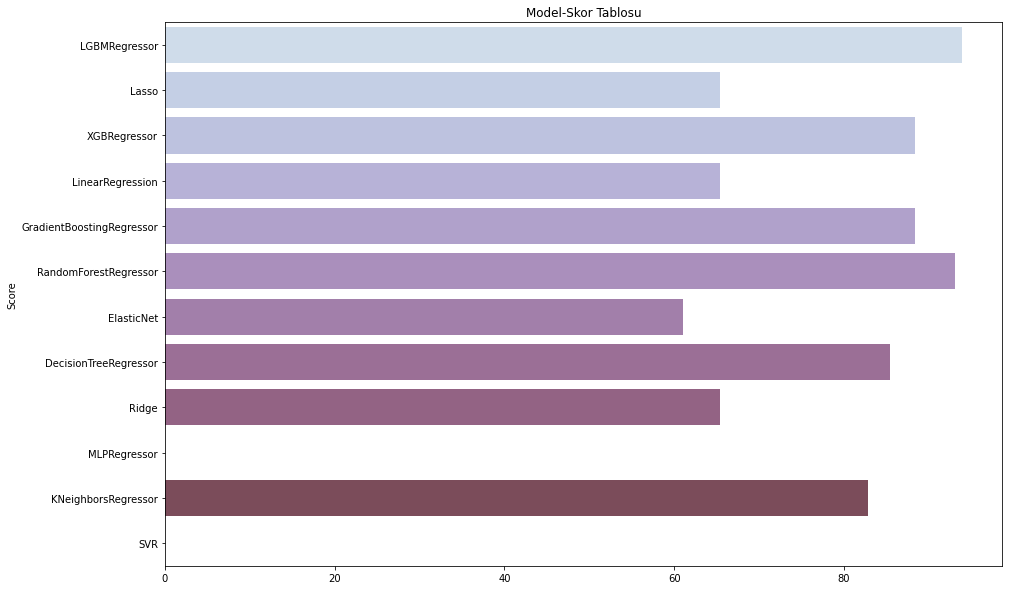

In [48]:


plt.figure(figsize=(15,10))
ax = sns.barplot(x=scores, y=modeller, palette="ch:4.5,-.7,dark=.3")
ax.set_title("Model-Skor Tablosu")
ax.set_ylabel("Modeller")
ax.set_ylabel("Score")
plt.show()

In [49]:
lgbm=LGBMRegressor()     
lgbm.fit(x_train,y_train)

lgbm_pred = lgbm.predict(x_test)

model_score = lgbm.score(x_test,y_test)
r2_skor = r2_score(y_test, lgbm_pred)
hata_skor = np.sqrt(mean_squared_error(y_test, lgbm_pred))
ev = metrics.explained_variance_score(y_test, lgbm_pred)

print("Model Score: ", model_score*100)
print("R2_skoru: ", r2_skor)
print("Hata Kare: ", hata_skor)
print("Explained Variance : ", ev)

Model Score:  93.9174304981272
R2_skoru:  0.9391743049812722
Hata Kare:  14831.18488609659
Explained Variance :  0.9391743241100291


In [50]:
lgbm_params={'learning_rate':[0.01, 0.1, 0.5],   
            'n_estimators':[200,500,1000],
            'max_depth':[5, 7, 10],
             'colsample_bytree':[0.7, 0.9, 1.0],
             'subsample': [0.4, 0.5, 0.6, 0.7]
             }
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 27.6min finished


In [51]:

lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 0.4}

In [52]:
lgbm_tuned=LGBMRegressor(learning_rate = lgbm_cv_model.best_params_['learning_rate'],
                        max_depth = lgbm_cv_model.best_params_['max_depth'],
                        n_estimators = lgbm_cv_model.best_params_['n_estimators'],
                        colsample_bytree = lgbm_cv_model.best_params_['colsample_bytree'],
                        subsample=lgbm_cv_model.best_params_['subsample']).fit(x_train,y_train)

y_pred=lgbm_tuned.predict(x_test)

model_score = lgbm_tuned.score(x_test,y_test)
r2_skor = r2_score(y_test, y_pred)
hata_skor = np.sqrt(mean_squared_error(y_test, y_pred))
adjusted_r2_skor = 1 - (1-r2_skor)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
ev = metrics.explained_variance_score(y_test, y_pred)

print("Model scoru : ", model_score*100)
print("R2_skoru: ", r2_skor)
print("Hata Kare: ", hata_skor)
print("Adjusted_R2_skoru : ", adjusted_r2_skor)
print("Explained Variance : ", ev)


Model scoru :  94.72769638319976
R2_skoru:  0.9472769638319976
Hata Kare:  13808.05521076068
Adjusted_R2_skoru :  0.9468549198232635
Explained Variance :  0.9472886515936138


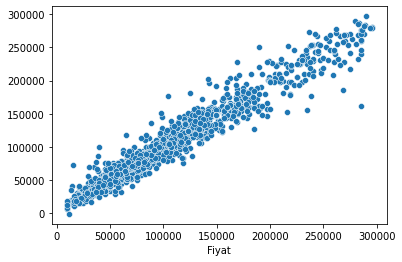

In [53]:

sns.scatterplot(x=y_test,y=y_pred)

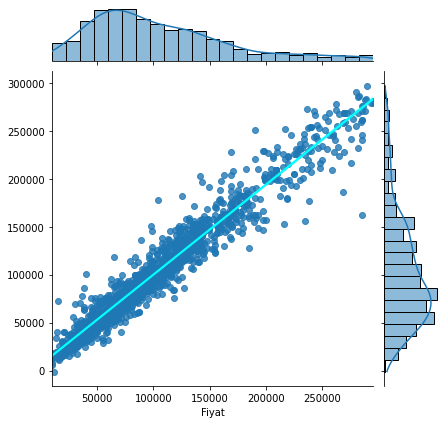

In [54]:
sns.jointplot(x=y_test, y=y_pred,  kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})

In [69]:

real_pred = pd.DataFrame({'Gerçek Fiyat': np.array(y_test).flatten(), 'Tahmini Fiyat': y_pred.flatten(),'Fark':np.array(y_test).flatten()-y_pred.flatten()})
real_pred.Fark=round(real_pred.Fark)


In [72]:

real_pred['Yuzdelik_Fark']=100*(1-(real_pred['Gerçek Fiyat']/real_pred['Tahmini Fiyat']))
real_pred.Yuzdelik_Fark=round(real_pred.Yuzdelik_Fark)
real_pred['Yuzdelik_Fark'].head()



0   -12.0
1     4.0
2     5.0
3     1.0
4   -37.0
Name: Yuzdelik_Fark, dtype: float64

In [73]:
real_pred.head()

,Gerçek Fiyat,Tahmini Fiyat,Fark,Yuzdelik_Fark
0,60000,53726.354250,6274.0,-12.0
1,79750,83099.037386,-3349.0,4.0
2,64000,67548.646150,-3549.0,5.0
3,55900,56456.296692,-556.0,1.0
4,79000,57827.140995,21173.0,-37.0


In [89]:

result = pd.concat([df, real_pred], axis=1, join="inner")


In [116]:
tahmin=result.head(10)

In [117]:
tahmin['Arac Tip Grubu'] = tahmin['Arac Tip Grubu'].map({126:'CL',306:'RSX',359:'Tucson',209:'Giulietta',11:'147',263:'Mito',167:'Giulietta'})

In [118]:
tahmin['Yakıt Turu'] = tahmin['Yakıt Turu'].map({2:'Dizel',1:'Benzin/LPG',4:'Hibrit'})


In [119]:
tahmin['Vites'] = tahmin['Vites'].map({0:'Düz Vites',1:'Otomatik Vites',2:'Yarı Otomatik Vites'})


In [121]:
tahmin['CCM'] = tahmin['CCM'].map({4:'1801-2000 cc',1:'1300 cc ve altı',2:'1301-1600 cc',3:'1601-1800 cc'})

In [122]:
tahmin['Beygir Gucu'] = tahmin['Beygir Gucu'].map({2.0:'101-125 BG',17.0:'76-100 BG',4.0:'151-175 BG',1.0:'100 BG ve altı'})


In [123]:
tahmin['Renk'] = tahmin['Renk'].map({18:'Mavi',23:'Turkuaz',13:'Kahverengi',4:'Beyaz',17:'Lacivert',16:'Kırmızı',9:'Gri',22:'Siyah'})

In [124]:
tahmin['Kasa Tipi'] = tahmin['Kasa Tipi'].map({9:'Sedan',8:'Roadster',5:'Hatchback 5 Kapı'})


In [125]:
tahmin['Kimden'] = tahmin['Kimden'].map({1:'Sahibinden',0:'Galeriden',2:'Yetkili'})

In [126]:
tahmin['Durum'] = tahmin['Durum'].map({1:'2. El',0:'0 KM'})

In [127]:

tahmin.head(10)

,Marka,Arac Tip Grubu,Arac Tip,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,car_age,Gerçek Fiyat,Tahmini Fiyat,Fark,Yuzdelik_Fark
1,Acura,CL,1612,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500,5.0,79750,83099.037386,-3349.0,4.0
2,Acura,CL,1171,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750,26.0,64000,67548.646150,-3549.0,5.0
3,Acura,CL,1612,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000,7.0,55900,56456.296692,-556.0,1.0
4,Acura,CL,1171,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750,10.0,79000,57827.140995,21173.0,-37.0
5,Acura,CL,1171,Dizel,Düz Vites,1801-2000 cc,101-125 BG,Lacivert,Roadster,Galeriden,2. El,320000,42500,21.0,44500,39282.070928,5218.0,-13.0
6,Acura,CL,1171,Dizel,Otomatik Vites,1301-1600 cc,101-125 BG,Kırmızı,Sedan,Galeriden,2. El,183,170000,6.0,197000,156586.266330,40414.0,-26.0
7,Acura,CL,1612,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Beyaz,Hatchback 5 Kapı,Sahibinden,2. El,79000,82500,6.0,57500,48863.425295,8637.0,-18.0
8,Acura,RSX,1739,Hibrit,Otomatik Vites,1601-1800 cc,100 BG ve altı,Beyaz,Sedan,Yetkili,0 KM,15662,189000,1.0,76000,75784.045810,216.0,-0.0
9,Acura,RSX,1739,Hibrit,Otomatik Vites,1601-1800 cc,100 BG ve altı,Gri,Sedan,Yetkili,0 KM,31971,189000,1.0,134750,135379.135138,-629.0,0.0
10,Acura,CL,1612,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,252000,36750,19.0,149000,148209.083743,791.0,-1.0


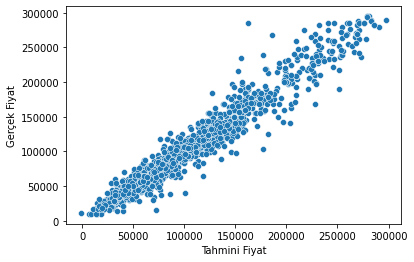

In [134]:
sns.scatterplot(x='Tahmini Fiyat',y='Gerçek Fiyat',data=real_pred )


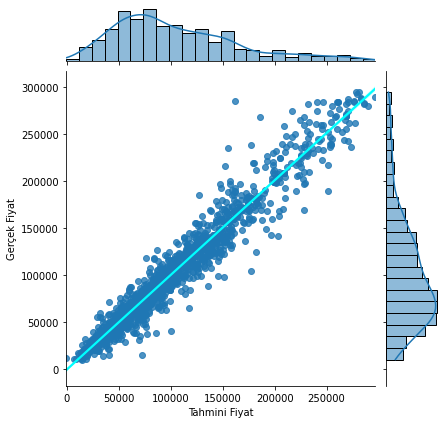

In [131]:
sns.jointplot(x='Tahmini Fiyat',y='Gerçek Fiyat',data=real_pred , kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})